In [ ]:
#!C:/lidar_env/Scripts/pip install trame

In [1]:
import numpy as np
import open3d as o3d
import laspy

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import os

base_dir = r"data\Tschernitz"

# List to store the contents of each .laz file
laz_data_list = []

# Collect and load all .laz files into the list
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".laz"):
            file_path = os.path.join(root, file)
            print(f"Loading file: {file_path}")
            las_data = laspy.read(file_path)
            laz_data_list.append(las_data)  # Store the data in the list

# Print the total number of .laz files loaded
print(f"Total .laz files loaded into list: {len(laz_data_list)}")


Loading file: data\Tschernitz\als_33470-5714\als_33470-5714.laz
Loading file: data\Tschernitz\als_33470-5715\als_33470-5715.laz
Loading file: data\Tschernitz\als_33470-5716\als_33470-5716.laz
Loading file: data\Tschernitz\als_33471-5713\als_33471-5713.laz
Loading file: data\Tschernitz\als_33471-5714\als_33471-5714.laz
Loading file: data\Tschernitz\als_33471-5715\als_33471-5715.laz
Loading file: data\Tschernitz\als_33471-5716\als_33471-5716.laz
Loading file: data\Tschernitz\als_33472-5713\als_33472-5713.laz
Loading file: data\Tschernitz\als_33472-5714\als_33472-5714.laz
Loading file: data\Tschernitz\als_33472-5715\als_33472-5715.laz
Loading file: data\Tschernitz\als_33472-5716\als_33472-5716.laz
Loading file: data\Tschernitz\als_33473-5713\als_33473-5713.laz
Loading file: data\Tschernitz\als_33473-5714\als_33473-5714.laz
Loading file: data\Tschernitz\als_33473-5715\als_33473-5715.laz
Loading file: data\Tschernitz\als_33474-5713\als_33474-5713.laz
Loading file: data\Tschernitz\als_33474-

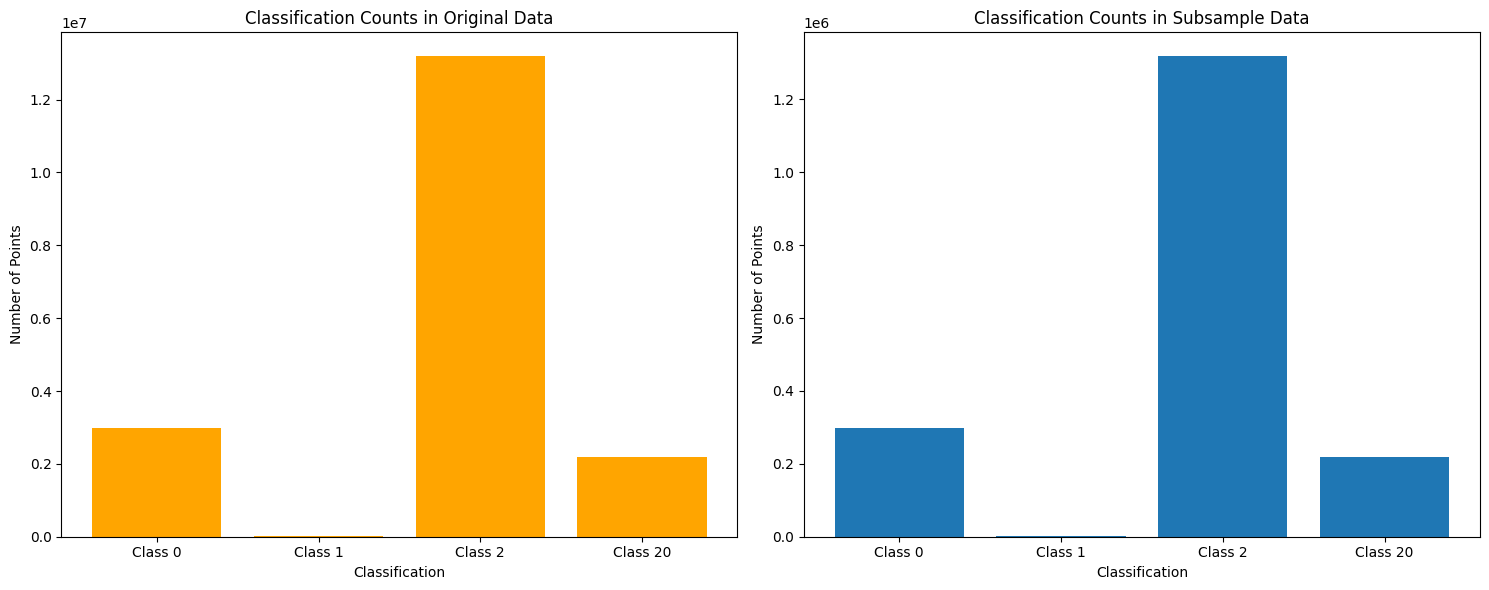

In [15]:
# Access any loaded .laz file data by index

example_index = 7  # Replace with the desired index
las_data = laz_data_list[example_index]

# Extract attributes from the original data
points = np.vstack((las_data.x, las_data.y, las_data.z)).transpose()
intensity = las_data.intensity
return_number = las_data.return_number
number_of_returns = las_data.number_of_returns
classification = las_data.classification

# Define subsampling ratio
subsample_ratio = 0.1  # Adjust as needed for performance
sample_size = int(len(points) * subsample_ratio)
indices = np.random.choice(points.shape[0], sample_size, replace=False)

# Subsample attributes
subsampled_points = points[indices]
subsampled_intensity = intensity[indices]
subsampled_return_number = return_number[indices]
subsampled_number_of_returns = number_of_returns[indices]
subsampled_classification = classification[indices]

# Calculate the counts of each classification in both the original and subsampled datasets
unique_classifications = np.unique(classification)
original_class_counts = np.array([np.sum(classification == uc) for uc in unique_classifications])
subsample_class_counts = np.array([np.sum(subsampled_classification == uc) for uc in unique_classifications])

# Define intensity bins based on quantiles for categorization
low, medium, high = np.quantile(intensity, [0.33, 0.66, 1.0])
intensity_labels = ["Low", "Medium", "High"]

# Categorize intensity data for original and subsampled data
original_intensity_categories = np.digitize(intensity, bins=[low, medium])
subsample_intensity_categories = np.digitize(subsampled_intensity, bins=[low, medium])

# Count the categories
original_intensity_counts = np.bincount(original_intensity_categories, minlength=3)
subsample_intensity_counts = np.bincount(subsample_intensity_categories, minlength=3)

# Prepare data for stacking
class_labels = [f"Class {int(cls)}" for cls in unique_classifications]
x = np.arange(len(class_labels))  # the label locations
width = 0.35  # width of the bars

# Plot stacked bars for classification
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Stacked bar plot for classification counts in the original data
ax1.bar(class_labels, original_class_counts, label="Original Data", color='orange')
ax1.set_xlabel("Classification")
ax1.set_ylabel("Number of Points")
ax1.set_title("Classification Counts in Original Data")

# Stacked bar plot for classification counts in the subsample data
ax2.bar(class_labels, subsample_class_counts, label="Subsample Data")
ax2.set_xlabel("Classification")
ax2.set_ylabel("Number of Points")
ax2.set_title("Classification Counts in Subsample Data")

plt.tight_layout()
plt.show()


In [29]:
import numpy as np
import laspy
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

def rasterize_lidar(file_path, grid_size=1.0):
    
    x = las_data.x
    y = las_data.y
    z = las_data.z
    intensity = las_data.intensity
    return_number = las_data.return_number
    
    # Define grid boundaries
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    
    # Calculate grid dimensions
    x_bins = int((x_max - x_min) / grid_size)
    y_bins = int((y_max - y_min) / grid_size)
    
    # Rasterize each attribute (e.g., Z for height, intensity)
    elevation_grid, _, _, _ = binned_statistic_2d(x, y, z, statistic="mean", bins=[x_bins, y_bins])
    intensity_grid, _, _, _ = binned_statistic_2d(x, y, intensity, statistic="mean", bins=[x_bins, y_bins])
    return_number_grid, _, _, _ = binned_statistic_2d(x, y, return_number, statistic="mean", bins=[x_bins, y_bins])
    
    # Stack layers to create a 3-channel image
    lidar_image = np.dstack((elevation_grid, intensity_grid, return_number_grid))
    
    # Fill NaN values with zero
    lidar_image = np.nan_to_num(lidar_image)
    
    return lidar_image


In [30]:
las_data = laspy.read(r'data\Tschernitz\als_33470-5714\als_33470-5714.laz')


In [31]:
lidar_image = rasterize_lidar(las_data)

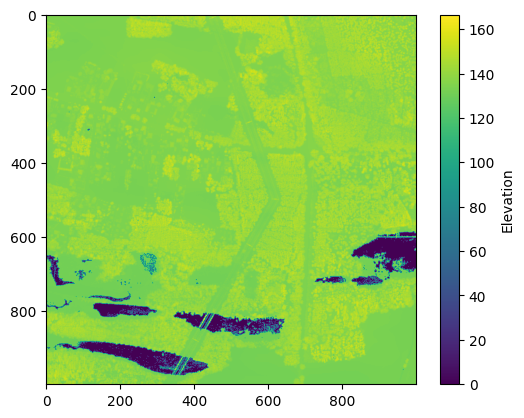

In [32]:
plt.imshow(lidar_image[:, :, 0], cmap='viridis')  # Display elevation layer
plt.colorbar(label="Elevation")
plt.show()

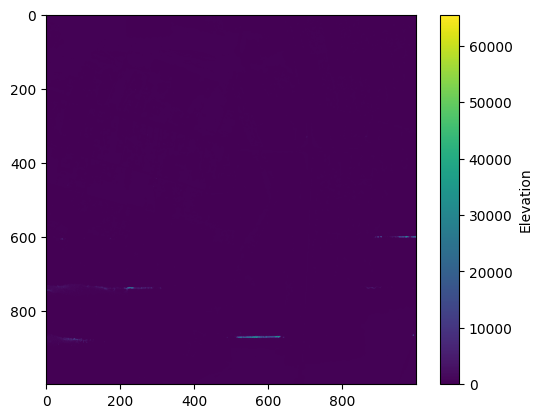

In [37]:
plt.imshow(lidar_image[:, :, 1], cmap='viridis')  # Display elevation layer
plt.colorbar(label="Elevation")
plt.show()

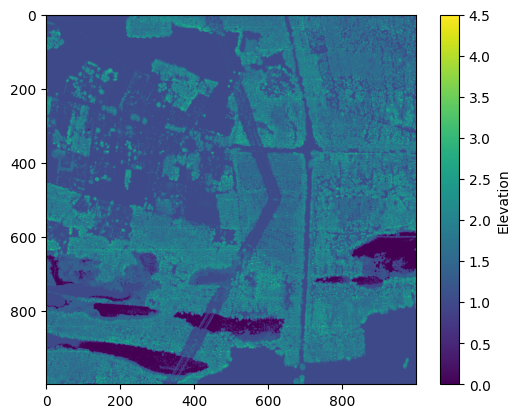

In [38]:
plt.imshow(lidar_image[:, :, 2], cmap='viridis')  # Display elevation layer
plt.colorbar(label="Elevation")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

def prepare_labels(las_data, grid_size=1.0):
    x = las_data.x
    y = las_data.y
    classification = las_data.classification
    
    # Define grid boundaries
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    
    # Calculate grid dimensions
    x_bins = int((x_max - x_min) / grid_size)
    y_bins = int((y_max - y_min) / grid_size)
    
    # Digitize x and y to find bin indices for each point
    x_indices = np.digitize(x, bins=np.linspace(x_min, x_max, x_bins + 1)) - 1
    y_indices = np.digitize(y, bins=np.linspace(y_min, y_max, y_bins + 1)) - 1
    
    # Initialize a grid to hold the mode of classification for each cell
    classification_grid = np.zeros((y_bins, x_bins), dtype=int)
    
    # Calculate the mode of classification for each grid cell
    for i in range(x_bins):
        for j in range(y_bins):
            mask = (x_indices == i) & (y_indices == j)
            if np.any(mask):
                # Use .item() to retrieve the scalar value in case mode returns a scalar
                cell_mode = mode(classification[mask])[0]
                classification_grid[j, i] = cell_mode.item() if cell_mode.size == 1 else cell_mode[0]
            else:
                classification_grid[j, i] = 0  # Assign background class for empty cells
    
    return classification_grid

label_grid = prepare_labels(las_data)
# Display the label grid
plt.imshow(label_grid, cmap='tab20')
plt.colorbar(label="Class Labels")
plt.title("Classification Labels Grid")
plt.show()

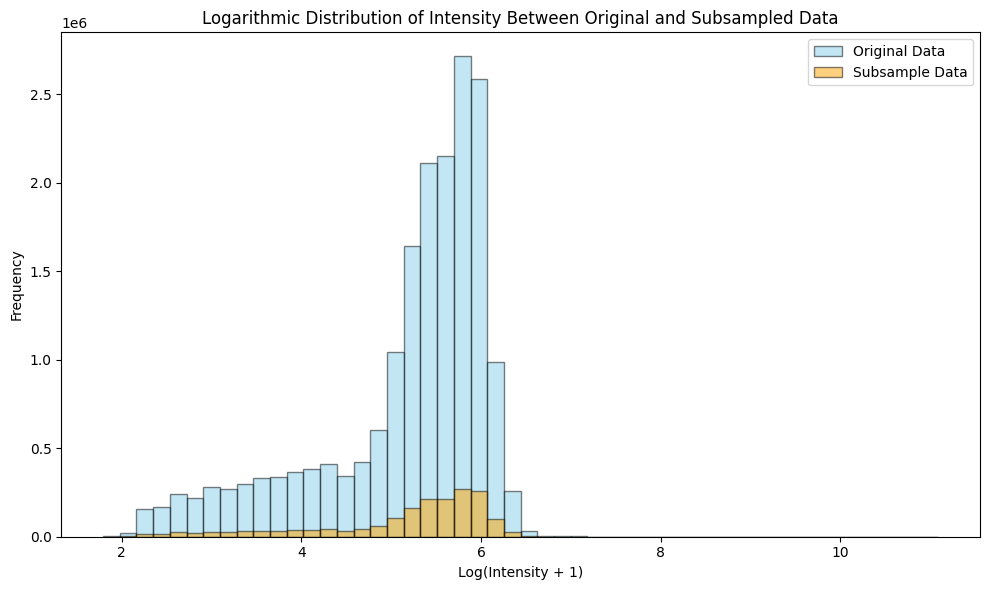

In [16]:
# Apply logarithmic transformation
log_intensity_original = np.log1p(intensity)  # log1p to handle zero values safely
log_intensity_subsampled = np.log1p(subsampled_intensity)

# Plot histograms of the logarithmic distribution of intensities
fig, ax = plt.subplots(figsize=(10, 6))
bins = 50  # Number of bins for histogram

ax.hist(log_intensity_original, bins=bins, alpha=0.5, label="Original Data", color='skyblue', edgecolor='black')
ax.hist(log_intensity_subsampled, bins=bins, alpha=0.5, label="Subsample Data", color='orange', edgecolor='black')

# Label the plot
ax.set_xlabel("Log(Intensity + 1)")
ax.set_ylabel("Frequency")
ax.set_title("Logarithmic Distribution of Intensity Between Original and Subsampled Data")
ax.legend()

plt.tight_layout()
plt.show()

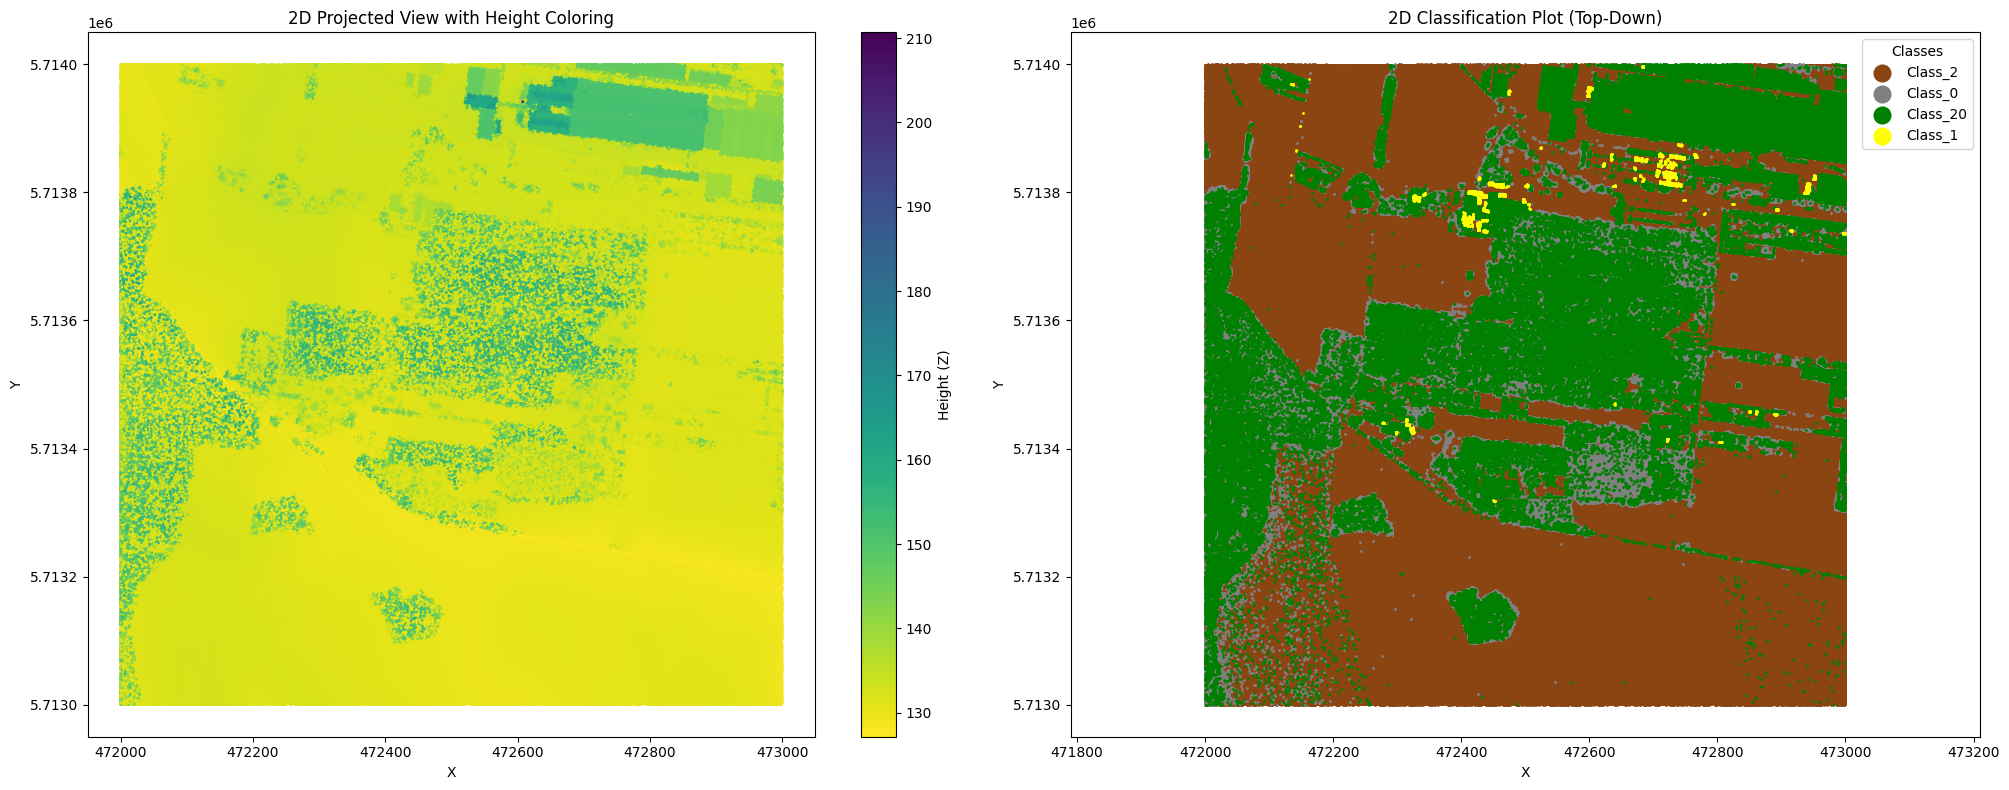

In [17]:
unique_classes, counts = np.unique(subsampled_classification, return_counts=True)

# Sort unique classes by counts in descending order
sorted_indices = np.argsort(-counts)
sorted_classes = unique_classes[sorted_indices]
sorted_counts = counts[sorted_indices]

# Define a list of distinct colors for the classes
colormap = ["saddlebrown", "gray", "green", "yellow"]  # Extend this list if more colors are needed

# Step 2: Populate `class_points` dictionary with points for each sorted class
class_points = {f"class_{int(class_value)}_points": subsampled_points[subsampled_classification == class_value] 
                for class_value in sorted_classes}

# 2D Projection (Flattening Z-axis)
plt.figure(figsize=(20, 8))

# Plot 1: 2D Projected View with Height Coloring
plt.subplot(1, 2, 1)
plt.scatter(subsampled_points[:, 0], subsampled_points[:, 1], c=subsampled_points[:, 2], cmap="viridis_r", s=1)
plt.colorbar(label="Height (Z)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title("2D Projected View with Height Coloring")

# Plot 2: 2D Classification Plot (Top-Down)
plt.subplot(1, 2, 2)

# Plot each class in descending order of count, using colors from colormap list
for idx, (label, points) in enumerate(class_points.items()):
    plt.scatter(
        points[:, 0], points[:, 1], 
        c=colormap[idx % len(colormap)],  # Access color by index, cycling if needed
        s=1, 
        label=label.replace("_points", "").capitalize()
    )

plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")  # Set the aspect ratio to be equal, making the plot square-shaped
plt.legend(loc="upper right", title="Classes", markerscale=12)  # Adjust markerscale as needed
plt.title("2D Classification Plot (Top-Down)")

plt.tight_layout()
plt.show()


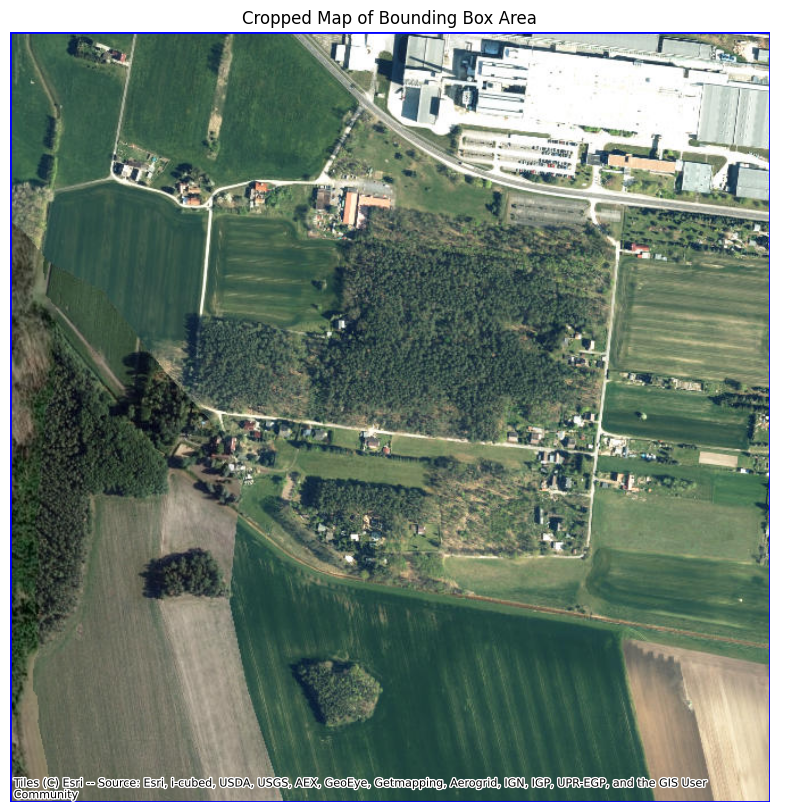

In [6]:
import geopandas as gpd
from shapely.geometry import box
from pyproj import Transformer
import contextily as ctx

# Initialize the transformer and bounding box in UTM (EPSG:25833)
transformer = Transformer.from_crs("epsg:25833", "epsg:4326", always_xy=True)
xmin, ymin, min_z = las_data.header.min
xmax, ymax, max_z = las_data.header.max

# Convert UTM coordinates to latitude and longitude
min_lon, min_lat = transformer.transform(xmin, ymin)
max_lon, max_lat = transformer.transform(xmax, ymax)

# Define the bounding box (without extra margin)
bbox = box(min_lon, min_lat, max_lon, max_lat)

# Create a GeoDataFrame for the bounding box
gdf = gpd.GeoDataFrame({"geometry": [bbox]}, crs="EPSG:4326")

# Convert the GeoDataFrame to Web Mercator (EPSG:3857) for compatibility with contextily
gdf = gdf.to_crs("EPSG:3857")

# Plot the cropped map focusing only on the bounding box
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="none", edgecolor="blue", linewidth=2)

# Add the basemap using contextily with satellite imagery tiles
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Crop the map to show only the bounding box area
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Hide axis for a cleaner look
ax.axis("off")

# Title
ax.set_title("Cropped Map of Bounding Box Area")

plt.show()


## Data Preparation and Rasterization

### Rasterizing LiDAR Data

In [19]:
subsampled_number_of_returns

<SubFieldView([4 1 1 ... 1 1 3])>

In [20]:
# Define the grid size in meters (e.g., 1 meter)
grid_size = 1.0

# Calculate bounding box
x_min, x_max = subsampled_points[:, 0].min(), subsampled_points[:, 0].max()
y_min, y_max = subsampled_points[:, 1].min(), subsampled_points[:, 1].max()

# Calculate grid dimensions based on bounding box and grid size
x_bins = int((x_max - x_min) / grid_size) + 1
y_bins = int((y_max - y_min) / grid_size) + 1

# Use these dimensions as the grid shape
grid_shape = (y_bins, x_bins)

print(f"Calculated grid dimensions: {grid_shape}")


Calculated grid dimensions: (1000, 1000)


In [ ]:
# Initialize empty grids for different features
elevation_grid = np.full((y_bins, x_bins), np.nan)
intensity_grid = np.full((y_bins, x_bins), np.nan)
number_of_returns_grid = np.full((y_bins, x_bins), np.nan)
classification_grid = np.full((y_bins, x_bins), -1)

# Populate grids by iterating over subsampled points
for i, (x, y, z, intensity, num_returns, cls) in enumerate(
    zip(subsampled_points[:, 0], subsampled_points[:, 1], subsampled_points[:, 2],
        subsampled_intensity, subsampled_number_of_returns, subsampled_classification)
):
    x_idx = int((x - x_min) / grid_size)
    y_idx = int((y - y_min) / grid_size)
    
    # Update grid values based on current point
    if np.isnan(elevation_grid[y_idx, x_idx]) or z > elevation_grid[y_idx, x_idx]:
        elevation_grid[y_idx, x_idx] = z
    intensity_grid[y_idx, x_idx] = np.nanmax([intensity_grid[y_idx, x_idx], intensity])
    number_of_returns_grid[y_idx, x_idx] = np.nanmean([number_of_returns_grid[y_idx, x_idx], num_returns])
    classification_grid[y_idx, x_idx] = cls



### Prepare Data for Random Forest

In [ ]:
# Flatten grids into a feature matrix for Random Forest
X_rf = np.column_stack([
    elevation_grid.ravel(),
    intensity_grid.ravel(),
    number_of_returns_grid.ravel()
])
y_rf = classification_grid.ravel()  # Labels

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)


### Train Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict and evaluate on test data
y_pred_rf = rf_model.predict(X_test_rf)
print(classification_report(y_test_rf, y_pred_rf))


### Prepare Data for U-Net

In [21]:
# Define grid size and resolution
grid_resolution = 1.0  # 1m x 1m resolution

# Calculate the grid dimensions
x_min, x_max = subsampled_points[:, 0].min(), subsampled_points[:, 0].max()
y_min, y_max = subsampled_points[:, 1].min(), subsampled_points[:, 1].max()
x_bins = int((x_max - x_min) / grid_resolution) + 1
y_bins = int((y_max - y_min) / grid_resolution) + 1

# Create empty grids
height_grid = np.zeros((y_bins, x_bins))
intensity_grid = np.zeros((y_bins, x_bins))
return_number_grid = np.zeros((y_bins, x_bins))

# Populate grids
for i, (x, y, z) in enumerate(subsampled_points):
    x_idx = int((x - x_min) / grid_resolution)
    y_idx = int((y - y_min) / grid_resolution)
    height_grid[y_idx, x_idx] = z
    intensity_grid[y_idx, x_idx] = subsampled_intensity[i]
    return_number_grid[y_idx, x_idx] = subsampled_return_number[i]

# Stack grids as channels to form an image for U-Net
lidar_image = np.stack([height_grid, intensity_grid, return_number_grid], axis=-1)


### Train U-Net Model with Additional Features

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

def build_unet(input_shape):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights="imagenet")
    encoder_layers = [base_model.get_layer(name).output for name in ['block_1_expand_relu', 'block_3_expand_relu', 'block_6_expand_relu', 'block_13_expand_relu']]
    x = base_model.output
    
    for encoder_layer in reversed(encoder_layers):
        x = layers.Conv2DTranspose(encoder_layer.shape[-1], kernel_size=(3, 3), strides=(2, 2), padding="same")(x)
        if x.shape[1] != encoder_layer.shape[1] or x.shape[2] != encoder_layer.shape[2]:
            height_diff = x.shape[1] - encoder_layer.shape[1]
            width_diff = x.shape[2] - encoder_layer.shape[2]
            x = layers.Cropping2D(((height_diff // 2, height_diff - height_diff // 2),
                                   (width_diff // 2, width_diff - width_diff // 2)))(x)
        x = layers.Concatenate()([x, encoder_layer])
        x = layers.Conv2D(encoder_layer.shape[-1], (3, 3), padding="same", activation="relu")(x)

    outputs = layers.Conv2D(4, (1, 1), activation="softmax")(x)
    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

unet_model = build_unet(input_shape)
unet_model.summary()


C:\Users\AylinGülüm\AppData\Local\Temp\ipykernel_59172\1111412911.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights="imagenet")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1000,      │          0 │ -                 │
│ (InputLayer)        │ 1000, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 500, 500,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 500, 500,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 500, 500,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 500,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 500,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 500,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 500, 500,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 500, 500,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 500, 500,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 500, 500,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 500, 500,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 501, 501,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 250, 250,  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 250, 250,  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 250, 250,  │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 250, 250,  │      2,304 │ block_1_depthwis

 Total params: 17,439,140 (66.53 MB)

 Trainable params: 17,405,028 (66.39 MB)

 Non-trainable params: 34,112 (133.25 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 235s 235s/step


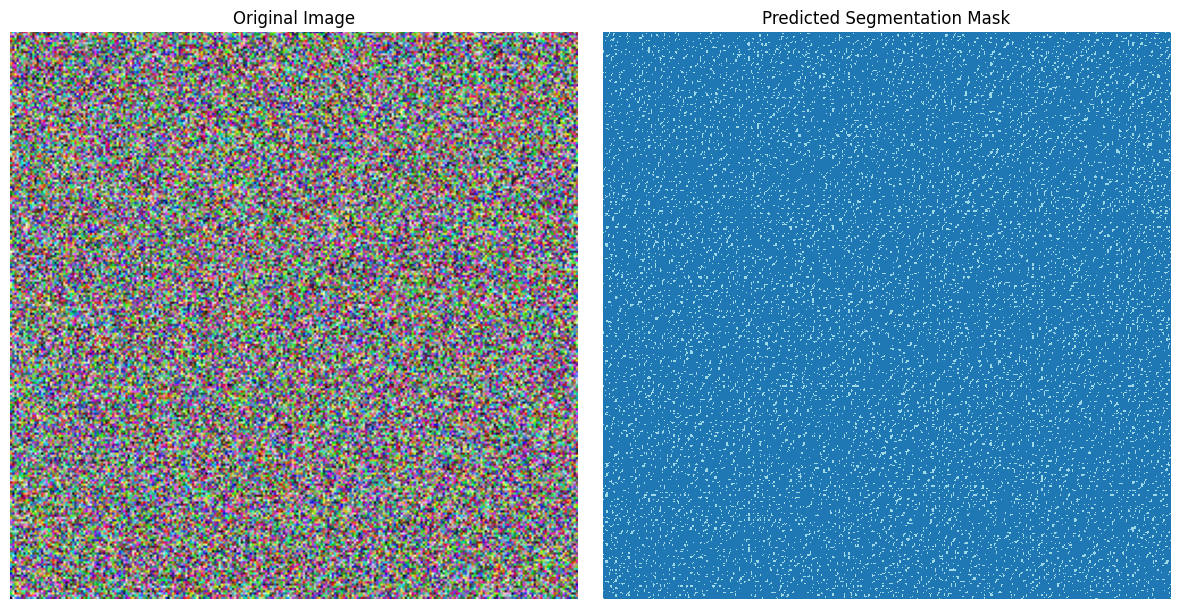

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import resize

# Example test image (replace this with your actual test data)
test_image = np.random.rand(256, 256, 3)  # Replace with actual test image

# Resize test image to match the U-Net model input shape
input_shape = (1000, 1000)  # Replace with your U-Net's expected input shape
resized_test_image = resize(test_image, input_shape).numpy()

# Run the U-Net model on the resized test image
predicted_mask = unet_model.predict(np.expand_dims(resized_test_image, axis=0))
predicted_mask = np.argmax(predicted_mask[0], axis=-1)  # Convert from one-hot encoding to class labels

# Plot the original image and the predicted mask
plt.figure(figsize=(12, 6))

# Plot original image (before resizing)
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

# Plot predicted mask
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask, cmap="tab20", interpolation="nearest")  # Change cmap based on the number of classes
plt.title("Predicted Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

# Function to build the U-Net model with a ResNet encoder
def build_unet(input_shape, num_classes):
    base_model = ResNet50(input_shape=input_shape, include_top=False, weights="imagenet")
    encoder_layers = [base_model.get_layer(name).output for name in ['conv1_relu', 'conv2_block3_out', 'conv3_block4_out', 'conv4_block6_out']]
    x = base_model.output
    
    # Decoder part of the U-Net
    for encoder_layer in reversed(encoder_layers):
        x = layers.Conv2DTranspose(encoder_layer.shape[-1], kernel_size=(3, 3), strides=(2, 2), padding="same")(x)
        x = layers.Concatenate()([x, encoder_layer])
        x = layers.Conv2D(encoder_layer.shape[-1], (3, 3), padding="same", activation="relu")(x)
    
    # Output layer with num_classes channels
    outputs = layers.Conv2D(num_classes, (1, 1), activation="softmax")(x)
    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Define input shape according to your data (e.g., 256x256 with 3 channels)
input_shape = (256, 256, 3)  # Adjust according to your data dimensions
num_classes = 4  # Adjust to the number of classes in your dataset

# Build and compile the model
unet_model = build_unet(input_shape, num_classes)
unet_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unet_model.summary()

# Example data preprocessing: Normalize data and prepare labels
def preprocess_data(image, label):
    image = image / 255.0  # Normalize image data to [0, 1]
    return image, label

# Prepare your training data (X_train and y_train should be preloaded as arrays of images and labels)
# Apply preprocessing to your dataset
X_train = np.array([preprocess_data(image, label)[0] for image, label in zip(X_train, y_train)])
y_train = np.array([preprocess_data(image, label)[1] for image, label in zip(X_train, y_train)])

# Train the model (use a subset for demonstration or full dataset if you have enough computational resources)
epochs = 10
batch_size = 16
unet_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Test data (using a sample test image for prediction)
test_image = np.random.rand(256, 256, 3)  # Replace with an actual test image loaded from your data
test_image = test_image / 255.0  # Normalize test image

# Run the U-Net model on the test image to get the segmentation prediction
predicted_mask = unet_model.predict(np.expand_dims(test_image, axis=0))
predicted_mask = np.argmax(predicted_mask[0], axis=-1)  # Convert from softmax output to class indices

# Plot the original image and the predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask, cmap="tab20")  # Adjust colormap as needed for clarity
plt.title("Predicted Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 73,358,084 (279.84 MB)

 Trainable params: 73,304,964 (279.64 MB)

 Non-trainable params: 53,120 (207.50 KB)

NameError: name 'X_train' is not defined